# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


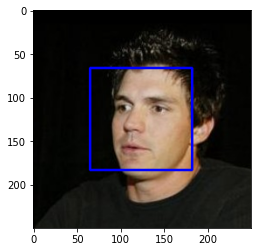

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
In 99% of human images a human face was detected by the human face detector algorithm and in 18% of dog images a human face was detected by the algorithm. 

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
count_faces_humans = 0
count_faces_dogs = 0

for h_file_path in human_files_short:
    is_face = face_detector(h_file_path)
    if is_face:
        count_faces_humans += 1

for d_file_path in dog_files_short:
    is_face = face_detector(d_file_path)
    if is_face:
        count_faces_dogs += 1

print('Percentage of human images in which face was detected: ', round(count_faces_humans/len(human_files_short)*100,2),'%')
print('Percentage of dog images in which face was detected: ', round(count_faces_dogs/len(dog_files_short)*100,2),'%')


Percentage of human images in which face was detected:  99.0 %
Percentage of dog images in which face was detected:  18.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)


# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image


    VGG16.eval()

    # load image
    img = Image.open(img_path)

    # define transforms
    transform = transforms.Compose([
                    # pictures should be at least of size 224x224
                    transforms.Resize((256,256)),
                    # convert to tensor, scale to range 0 to 1
                    transforms.ToTensor(),
                    # normalize to values give by torchvision docu
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    
    img = transform(img)

    # add batch dim 
    # input img is of shape [batch_dim, n_channels, width, height]
    img = img.unsqueeze(0)

    # check if CUDA is available
    cuda_available = torch.cuda.is_available()

    # move model to GPU if CUDA is available
    if cuda_available:
        x = img.cuda()
    else:
        x = img
        
    with torch.no_grad():
        output = VGG16(x)

    _,pred_class_idx = torch.max(output,1)

    
    return pred_class_idx.cpu().numpy()[0] # predicted class index as integer value

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred_class_idx = VGG16_predict(img_path)
    if pred_class_idx >= 151 and pred_class_idx <= 268:
        return True
    else:
        return False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  With the VGG16 as a predictor, in human files_short 1% of images detected a dog. In dog_files_short, 99% of images detected a dog.


In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
det_result_dogs = list()
det_result_hum = list()

for img_path in dog_files_short:
    if dog_detector(img_path):
        det_result_dogs.append(1)
    else:
        det_result_dogs.append(0)

for img_path in human_files_short:
    if dog_detector(img_path):
        det_result_hum.append(1)
    else:
        det_result_hum.append(0)

assert len(det_result_dogs)==100
assert len(det_result_hum)==100

pct_dog_dogs = np.sum(det_result_dogs)/len(dog_files_short)*100
pct_dog_hum = np.sum(det_result_hum)/len(human_files_short)*100

print('Percentage of images with dog detected in human_files_short: ', round(pct_dog_hum,2))
print('Percentage of images with dog detected in dog_files_short: ', round(pct_dog_dogs,2))

Percentage of images with dog detected in human_files_short:  1.0
Percentage of images with dog detected in dog_files_short:  99.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

resnet = models.resnet50(pretrained=True)

if use_cuda:
    resnet = resnet.cuda()

In [10]:
def ResNet50_predict(img_path):
    '''
    Use pre-trained ResNet-50 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to ResNet-50 model's prediction
    '''



    resnet.eval()

    # load image
    img = Image.open(img_path)

    # define transforms
    transform = transforms.Compose([
                    transforms.Resize((256,256)),
                    # convert to tensor, scale to range 0 to 1
                    transforms.ToTensor(),
                    # normalize to values give by torchvision docu
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    
    img = transform(img)

    # add batch dim 
    # input img is of shape [batch_dim, n_channels, width, height]
    img = img.unsqueeze(0)

    # check if CUDA is available
    cuda_available = torch.cuda.is_available()

    # move model to GPU if CUDA is available
    if cuda_available:
        x = img.cuda()
    else:
        x = img
        
    with torch.no_grad():
        output = resnet(x)

    _,pred_class_idx = torch.max(output,1)

    
    return pred_class_idx.cpu().numpy()[0] # predicted class index as integer value

In [11]:
def dog_detector_resnet(img_path):
 
    pred_class_idx = ResNet50_predict(img_path)
    if pred_class_idx >= 151 and pred_class_idx <= 268:
        return True
    else:
        return False

In [13]:
resn_result_dogs = list()
resn_result_hum = list()

for img_path in dog_files_short:
    if dog_detector_resnet(img_path):
        resn_result_dogs.append(1)
    else:
        resn_result_dogs.append(0)

for img_path in human_files_short:
    if dog_detector_resnet(img_path):
        resn_result_hum.append(1)
    else:
        resn_result_hum.append(0)

assert len(resn_result_dogs)==100
assert len(resn_result_hum)==100

pct_dog_dogs = np.sum(resn_result_dogs)/len(dog_files_short)*100
pct_dog_hum = np.sum(resn_result_hum)/len(human_files_short)*100

print('Percentage of images with dog detected in human_files_short: ', round(pct_dog_hum,2))
print('Percentage of images with dog detected in dog_files_short: ', round(pct_dog_dogs,2))

Percentage of images with dog detected in human_files_short:  1.0
Percentage of images with dog detected in dog_files_short:  99.0


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define paths
train_dir = 'dogImages/train/'
val_dir = 'dogImages/valid/'
test_dir = 'dogImages/test/'



# categories are defined by subfolders in each datafolder
train_dir_content = os.listdir(train_dir)
folder_list = list()

for element in train_dir_content:
    if os.path.isdir(os.path.join(train_dir, element)):
        folder_list.append(element)
folder_list.sort()
categories = folder_list



# define transforms for training
transform_tr = transforms.Compose([
                transforms.Resize((256,256)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(25),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
                ])

# define transforms for validation and testing
transform_ts = transforms.Compose([
                    transforms.Resize((256,256)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
                    ])


# define transforms for testing (and validation)
train_dataset = datasets.ImageFolder(train_dir,transform=transform_tr)
val_dataset = datasets.ImageFolder(val_dir, transform=transform_ts)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_ts)

data_scratch = {}
data_scratch['train'] = train_dataset
data_scratch['valid'] = val_dataset
data_scratch['test'] = test_dataset


# define dataloaders
train_dataloader = DataLoader(train_dataset,batch_size=4,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=4,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=4,shuffle=False)

loaders_scratch = {}
loaders_scratch['train'] = train_dataloader
loaders_scratch['valid'] = val_dataloader
loaders_scratch['test'] = test_dataloader


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: I use the torchvision.transforms.Resize class to resize the images into squares of 256 x 256 pixels. This stretches the images into the indicated size and does not preserve the ratio of the original image. I did not apply any cropping to the images in order to preserve all the information. Concerning the size of the images, I did not want to apply an unnecessarily large image size and at the same time I wanted to preserve enough pixels so that the image still conains all the information relevant in order to extract the features necessary for dog breed classification. I researched the internet and found several sources indicating that image sizes of 256x256 worked well even in deep convolutional neural networks with detail driven tasks such as diagnostics based on chest radiography (see sources below). Given that the pytorch documentation for pretrained torchvision models also suggests a minimum size of at least 224x224 pixels, I decided to set the size to squares of 256 x 256 pixels. 

I augmented the dataset by randomly applying a horizontal flip to the image, that is I randomly mirrored the images in the horizontal direction so that a dog that faced to the right in the original image would be facing to the left after a horizontal flip. In addition I rotated the images up to an angle of 25 degrees. I implemented these augmentations in order to facilitate generalization of the network when faced with images it had not seen during training. 

Finally I converted the images to tensors with a value range from 0 to 1 and I normalized them using the mean and std values provided by the pytorch documentation for pretrained vision models (https://pytorch.org/vision/stable/models.html). 
  
Source references image size:  
https://pubs.rsna.org/doi/full/10.1148/ryai.2019190015  
Al-Shweiki, Jumana. (2021). Re: Which Image resolution should I use for training for deep neural network?. Retrieved from: https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network/6051b7d5c09ed04d7d488659/citation/download. 



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,32,5,padding=2) #256
        self.conv2 = nn.Conv2d(32,64,5,padding=2) #256

        self.conv3 = nn.Conv2d(64,128,3,padding=1) #128
        self.conv4 = nn.Conv2d(128,256,3,padding=1) #128

        self.conv5 = nn.Conv2d(256,256,2) #63
        self.conv6 = nn.Conv2d(256, 256,2) #62

        self.conv7 = nn.Conv2d(256,512,2) #30
        self.conv8 = nn.Conv2d(512,512,3) #28

        
        self.conv9 = nn.Conv2d(512,512,2) #13
        self.conv10 = nn.Conv2d(512,512,2) #12

        self.pool = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(512*6*6,9216) 
        self.fc2 = nn.Linear(9216,4608)
        self.fc3 = nn.Linear(4608,2304)
        self.fc4 = nn.Linear(2304,133)

        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))   # w=h=256
        x = F.relu(self.conv2(x))   # w=h=256
        x = self.pool(x)            # w=h=128
        x = F.relu(self.conv3(x))   # w=h=128
        x = F.relu(self.conv4(x))   # w=h=128
        x = self.pool(x)            # w=h=64
        x = F.relu(self.conv5(x))   # w=h=63
        x = F.relu(self.conv6(x))   # w=h=62
        x = self.pool(x)            # w=h=31
        x = F.relu(self.conv7(x))   # w=h=30
        x = F.relu(self.conv8(x))   # w=h=28
        x = self.pool(x)            # w=h=14
        x = F.relu(self.conv9(x))   # w=h=13
        x = F.relu(self.conv10(x))  # w=h=12
        x = self.pool(x)            # w=h=6

        x = x.view(-1,512*6*6)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I aimed at building a CNN architecture with up to 10 convolutional layers followed by three to four fully connected layers. I decided to apply larger filter kernels of size 5x5 in the initial layers of the network that are known to filter out fundamental coarse features of an image such as horizontal or vertical lines and I narrowed the kernel sizes in deeper layers that detected more complex features to a kernel size of 3x3 and finally 2x2. I also applied maxpooling layers between blocks of 2 layers to reduce the size of the feature maps. I increased the depth of the filter channels from layer to layer starting out with an output depth of 32 in the initial layer up to an input_depth=output_depth=512 in the final layers. In the final fully connected layers for classification, I initially used only a dropout rate of 25% and I applied it prior to one layer. In this case the training and validation error decreased both during the first few epochs and quite soon the validation error started increasing while the training error leveled further down. I therefore assumed that the network failed to generalize to the validation set while overadapting to the training set. In order to prevent this from happening or to at least reduce it, I increased the dropout to 0.5 and applied it prior to all the fully connected layers. This improved the networks generalization to the validation set. Finally I also reduced the learning rate. I needed to train with a very small batch size of n=4 because my GPU would run out of memory otherwise. This small batch size given the present architecture was also the reason why I did not apply batch normalization because it tends to be unstable with small batch sizes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.00003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output,target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))


        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f'Decrease of validation loss. Saving current model of epoch {epoch}')
            torch.save(model.state_dict(), save_path) 
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [18]:
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt') # was 100 epochs before

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.884049 	Validation Loss: 4.873699
Decrease of validation loss. Saving current model of epoch 1
Epoch: 2 	Training Loss: 4.874120 	Validation Loss: 4.869627
Decrease of validation loss. Saving current model of epoch 2
Epoch: 3 	Training Loss: 4.870708 	Validation Loss: 4.856514
Decrease of validation loss. Saving current model of epoch 3
Epoch: 4 	Training Loss: 4.721725 	Validation Loss: 4.635737
Decrease of validation loss. Saving current model of epoch 4
Epoch: 5 	Training Loss: 4.614769 	Validation Loss: 4.586687
Decrease of validation loss. Saving current model of epoch 5
Epoch: 6 	Training Loss: 4.518701 	Validation Loss: 4.481211
Decrease of validation loss. Saving current model of epoch 6
Epoch: 7 	Training Loss: 4.413861 	Validation Loss: 4.391193
Decrease of validation loss. Saving current model of epoch 7
Epoch: 8 	Training Loss: 4.330241 	Validation Loss: 4.353346
Decrease of validation loss. Saving current model of epoch 8
Epoch: 9 	Training Loss:

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.113985


Test Accuracy: 26% (219/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
train_dir = 'dogImages/train/'
val_dir = 'dogImages/valid/'
test_dir = 'dogImages/test/'


# categories are defined by subfolders in each datafolder
train_dir_content = os.listdir(train_dir)
folder_list = list()

for element in train_dir_content:
    if os.path.isdir(os.path.join(train_dir, element)):
        folder_list.append(element)
folder_list.sort()
categories = folder_list


# define transforms for training
transform_tr = transforms.Compose([
                transforms.Resize((256,256)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(25),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
                ])

# define transforms for validation and testing
transform_ts = transforms.Compose([
                    transforms.Resize((256,256)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
                    ])


# define transforms for testing (and validation)
train_dataset = datasets.ImageFolder(train_dir,transform=transform_tr)
val_dataset = datasets.ImageFolder(val_dir, transform=transform_ts)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_ts)
data_transfer = {}
data_transfer['train']=train_dataset
data_transfer['valid']=val_dataset
data_transfer['test']=test_dataset

# define dataloaders
train_dataloader = DataLoader(train_dataset,batch_size=4,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=4,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=4,shuffle=False)

loaders_transfer = {}
loaders_transfer['train'] = train_dataloader
loaders_transfer['valid'] = val_dataloader
loaders_transfer['test'] = test_dataloader

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
vgg19 = models.vgg19(pretrained=True)
print(vgg19)



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [22]:
# get inputs of last layer of classifier
ll_inputs = vgg19.classifier[6].in_features


# redefine last layer so that output = number of dog breeds = 133
vgg19.classifier[6] = nn.Linear(ll_inputs, len(categories))

# freeze parameters in features component of vgg19 (=conv layers)
for parameter in vgg19.features.parameters():
    parameter.requires_grad = False

model_transfer = vgg19

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I used the VGG19 model for transfer learning and I also tried out AlexNet. Both of these had been trained on the ImageNet database and thus had been trained on recognizing 1000 object types, including 120 dog breeds. So both models had been trained on images that contained data similar to the present dataset. Regarding the VGG19 model, I downloaded the pretrained model and took a look at the model architecture by printing it. I froze all the model paramters in the convolutional layers, to ensure that the weights of these filters would not change during further training. For the final fully connected layers in the classifier component, I did not freeze the weights so that the parameters of these layers would adapt during training to best classifiy the present dog breed dataset of 133 categories. Finally I changed the output nodes of the last classification layer to 133 so that it would classifiy the 133 dog breed categories contained in the present dataset. I followed the same procedure when using the pretrained AlexNet. For the VGG19 model I recieved a testing accuracy of 87%, which was a lot higher than for AlexNet with 68 %. I think the architecture of the final model is suitable for the task because it uses the pretrained convolutional layers of the VGG19 model for feature extraction, which had been trained on the ImageNet dataset that also contained different dog breeds. Due to this, there are filters even in deeper layers that are already trained to extract features that allow to distinguish between dog breeds. In addition the model is set to adapt to the present dataset of 133 dog breeds by leaving the weights of the final classification layers trainable and by ensuring that the output of the last classifier layer properly represents the 133 categories.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [23]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Epoch: 1 	Training Loss: 2.168445 	Validation Loss: 0.679282
Decrease of validation loss. Saving current model of epoch 1
Epoch: 2 	Training Loss: 0.869914 	Validation Loss: 0.529134
Decrease of validation loss. Saving current model of epoch 2
Epoch: 3 	Training Loss: 0.706889 	Validation Loss: 0.482542
Decrease of validation loss. Saving current model of epoch 3
Epoch: 4 	Training Loss: 0.598833 	Validation Loss: 0.479073
Decrease of validation loss. Saving current model of epoch 4
Epoch: 5 	Training Loss: 0.545672 	Validation Loss: 0.472824
Decrease of validation loss. Saving current model of epoch 5
Epoch: 6 	Training Loss: 0.482800 	Validation Loss: 0.467288
Decrease of validation loss. Saving current model of epoch 6
Epoch: 7 	Training Loss: 0.441112 	Validation Loss: 0.441445
Decrease of validation loss. Saving current model of epoch 7
Epoch: 8 	Training Loss: 0.434319 	Validation Loss: 0.453490
Epoch: 9 	Training Loss: 0.393471 	Validation Loss: 0.416138
Decrease of validation l

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.445346


Test Accuracy: 87% (728/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


def predict_breed_transfer(img_path):

    # list of class names by index, i.e. a name can be accessed like class_names[0]
    class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

    # load the image and return the predicted breed
    model_transfer.eval()

    # load image
    img = Image.open(img_path)

    # define transforms
    transform = transforms.Compose([
                    transforms.Resize((256,256)),
                    # convert to tensor, scale to range 0 to 1
                    transforms.ToTensor(),
                    # normalize to values give by torchvision docu
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
    
    img = transform(img)

    # add batch dim 
    # input img is of shape [batch_dim, n_channels, width, height]
    img = img.unsqueeze(0)

    # check if CUDA is available
    cuda_available = torch.cuda.is_available()

    # move model to GPU if CUDA is available
    if cuda_available:
        x = img.cuda()
    else:
        x = img
        
    with torch.no_grad():
        output = model_transfer(x)

    _,pred_class_idx = torch.max(output,1)

    pred_class = class_names[pred_class_idx]
    
    return  pred_class



---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [27]:
# functions to resize image and to generate output display for app

from PIL import ImageDraw, ImageFont

def img_resize(img_path, max_width, max_height):
    img = Image.open(img_path)
    width,height = img.size
    curr_ratio = min(max_width/width,max_height/height)
    out_img = img.resize((int(width*curr_ratio),int(height*curr_ratio)), Image.ANTIALIAS)
    return out_img


def generate_output(img_path,is_dog,dog_breed):
    img = img_resize(img_path, 250,250)
    bg_img = Image.new("RGB",(350,350),(252,247,135))
    bg_img.paste(img,(0,0))
  
    if not dog_breed is None:
        if is_dog:
            img_text = f'Hello dog, you are a {dog_breed}'
        else:
            img_text = f'Hello human, you look like a {dog_breed}'

        fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf",11)
        d = ImageDraw.Draw(bg_img)
        d.text((10, 310), img_text, font=fnt,fill=(0,0,0))

    else:
        img_text = 'Error, no human or dog detected on image'
        fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf",11)
        d = ImageDraw.Draw(bg_img)
        d.text((10, 310), img_text, font=fnt,fill=(0,0,0))
    
    return bg_img




Image resize with PIL explained in: https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio

In [28]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if dog_detector(img_path):
        is_dog = True
        dog_breed = predict_breed_transfer(img_path)
        out_img = generate_output(img_path, is_dog,dog_breed)

    elif face_detector(img_path):
        is_dog = False
        dog_breed = predict_breed_transfer(img_path)
        out_img = generate_output(img_path,is_dog,dog_breed)
        
    else:
        is_dog = False
        dog_breed = None
    
    out_img = generate_output(img_path, is_dog, dog_breed)
    return out_img


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output of the app with the test images I used was better than I expected. Out of three images of humans one could not be identified as a human face because the person was facing sideways. The three dog images were classified correctly to their corresponding dog breeds (I generally would expect more errors here based on the accuracy of the underlying model). In addition a cat image and a monkey image were correctly not identified as containing a dog or human face and raised an expected error. Points for improvement are:
- The human face_detector algorithm could be improved so that a person who looks sideways is detected as a human and does not raise an error in the final 
algorithm. 
- The dog_detector model could be improved so that no dog is detected when the input is an image of a human
- The model for dog breed classification could be improved to improve the correct classification of dog pictures in the final algorithm
- The user experience and display of the output of the final algorithm could be improved
            


In [29]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

Images used in this final test set were obtained via advanced google image search with usage rights defined as Creative Commons, see Links below:

- [human image1] (https://pixabay.com/photos/portrait-human-face-loneliness-1878674/)
- [human image2] (https://pixabay.com/photos/woman-young-model-human-face-5044192/)
- [human image3] (https://pixabay.com/photos/man-male-black-portrait-african-984217/)
- [dog image1] (https://stocksnap.io/photo/dachshund-dog-UJZI46IRSV)
- [dog image2] (https://www.sprayedout.com/german-shepherd-dog-at-sunset/)
- [dog image3] (https://pixnio.com/media/retriever-dog-golden-glow-laying-cute)
- [cat image] (https://pixabay.com/photos/cat-funny-cat-cute-cat-cute-4262034/)
- [monkey image] (https://pixabay.com/photos/berber-monkeys-zoo-erfurt-4913718/)








In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
humans_dir = 'downloads_img/human/'
dogs_dir = 'downloads_img/dogs/'
animal_dir = 'downloads_img/animals'
results = list()

human_files = glob('downloads_img/human/*')
dog_files = glob('downloads_img/dogs/*')
animal_files = glob('downloads_img/animals/*')

for img_path in np.hstack((human_files[:3], dog_files[:3], animal_files[:2])):
    result_obj = run_app(img_path)
    results.append(result_obj)

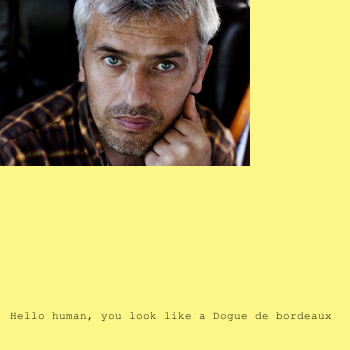

In [32]:
results[0]

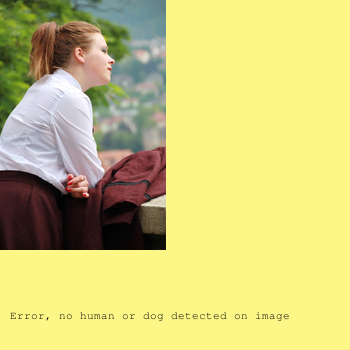

In [33]:
results[1]

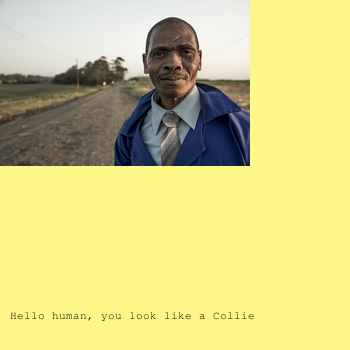

In [34]:
results[2]

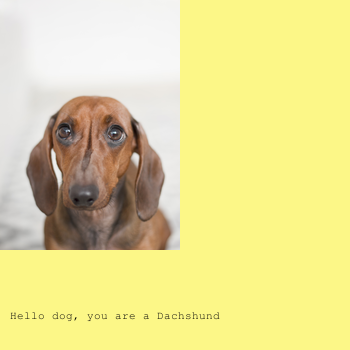

In [35]:
results[3]

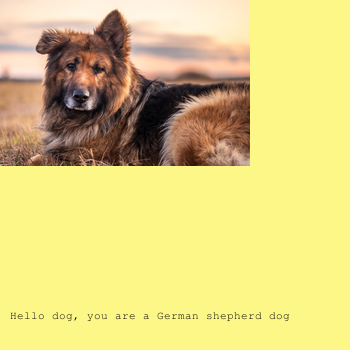

In [36]:
results[4]

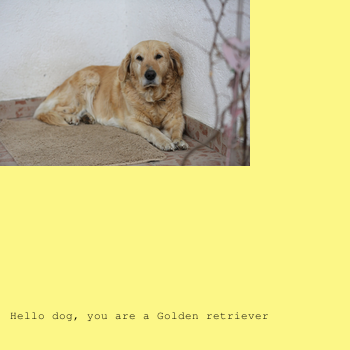

In [37]:
results[5]

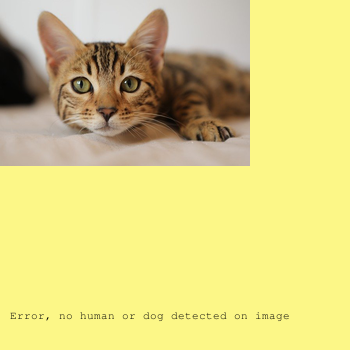

In [38]:
results[6]

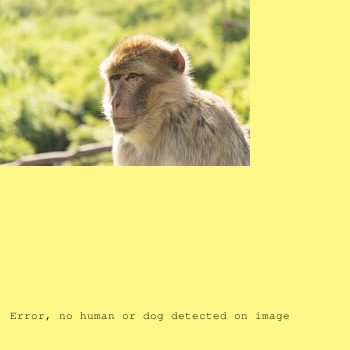

In [39]:
results[7]